In [1]:
import sys
import os

# Adiciona o diretório correto ao path
# Ajuste o caminho conforme sua estrutura real
sys.path.insert(0, os.getcwd())
print(f"✅ Diretório atual adicionado ao path: {os.getcwd()}")

from fuzzy_systems.learning.mandani_learning import MamdaniLearning
from fuzzy_systems import MamdaniSystem


import numpy as np
import matplotlib.pyplot as plt

# Configurar matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 100

print("✅ Bibliotecas importadas com sucesso!")
print(f"   Versão do NumPy: {np.__version__}")


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd


✅ Diretório atual adicionado ao path: /Users/1moi6/Desktop/Minicurso Fuzzy/fuzzy_systems
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✅ Bibliotecas importadas com sucesso!
   Versão do NumPy: 2.2.6


In [29]:

# ==================== 1. FUNÇÃO ALVO ====================
def function_to_learn(x):
    """Função linear: f(x) = -2x + 5"""
    return -2 * x + 5

# ==================== 2. DADOS ====================

# Dados de treino
np.random.seed(42)
n_train = 50
X_train= np.linspace(0, 1, n_train).reshape(-1, 1)
# X_random = np.random.uniform(0, 1, (n_train, 1))
y_train =function_to_learn(X_train).flatten()

# Dados de teste (mais densos para visualização)
n_test = 100
X_test = np.random.uniform(0, 1, (n_test, 1))
y_test = function_to_learn(X_test).flatten()

# ==================== 3. CRIAR SISTEMA FUZZY ====================

fis = MamdaniSystem()
input_universe = (0,1)
diff = y_train.max() - y_train.min()

output_universe = (y_train.min() - 0.1*diff, y_train.max() + 0.1*diff)

fis.add_input('x', input_universe)
fis.add_output('y', output_universe)

num_input_mfs = 7
num_output_mfs = 7

input_centers = np.linspace(input_universe[0], input_universe[1], num_input_mfs)
del_in = (input_centers[1]-input_centers[0])
for i in range(num_input_mfs):
    a =  input_centers[i] - del_in
    b =  input_centers[i]
    c =  input_centers[i] + del_in
    fis.add_term('x', f'Low_{i+1}', 'trimf', (a, b, c))     

output_centers = np.linspace(output_universe[0], output_universe[1], num_output_mfs)
del_out = (output_centers[1]-output_centers[0])
for i in range(num_output_mfs):
    a =  output_centers[i] - del_out
    b =  output_centers[i]
    c =  output_centers[i] + del_out
    fis.add_term('y', f'Low_{i+1}', 'trimf', (a, b, c))

fis.info()


📊 INFORMAÇÕES DO SISTEMA: Mamdani FIS

🔧 Tipo: MamdaniSystem
📝 Nome: Mamdani FIS

📥 VARIÁVEIS DE ENTRADA (1):
──────────────────────────────────────────────────────────────────────
  1. 'x'
     Universo: (0, 1)
     Termos (7): 'Low_1', 'Low_2', 'Low_3', 'Low_4', 'Low_5', 'Low_6', 'Low_7'

📤 VARIÁVEIS DE SAÍDA (1):
──────────────────────────────────────────────────────────────────────
  1. 'y'
     Universo: (np.float64(2.8), np.float64(5.2))
     Termos (7): 'Low_1', 'Low_2', 'Low_3', 'Low_4', 'Low_5', 'Low_6', 'Low_7'

📋 REGRAS:
──────────────────────────────────────────────────────────────────────
  Total: 0 regras

⚙️  CONFIGURAÇÕES:
──────────────────────────────────────────────────────────────────────
  Defuzzificação: DefuzzMethod.CENTROID

💡 EXEMPLO DE USO:
──────────────────────────────────────────────────────────────────────
  # Adicionar uma regra (sintaxe recomendada - tupla plana):
  system.add_rule('Low_1', 'Low_1')

  # Adicionar múltiplas regras:
  system.add_rules([


In [50]:
learner = MamdaniLearning(fis, num_points=1000, verbose=True)

In [53]:
learner.fit_rules(
            X_train, y_train,
            optimizer='sa',
            optimizer_params={'temperature_init': 100.0, 'cooling_rate': 0.95, 'max_iterations': 5000,'temperature_min': 1e-6},
            initial_solution_method='random'
        )

y_pred_train = learner.predict(X_train)
y_pred_test = learner.predict(X_test)

rmse_train = learner.get_cost()
rmse_test = learner.score(X_test, y_test)


📚 MAMDANI FUZZY RULE LEARNING
Optimizer: SA

🔧 Creating efficient FIS representation:
 - Input variables: 1
 - MFs per input: [7]
 - Output MFs: 7
 - AND operator: TNorm.MIN
 - Implication: min
 - Aggregation: max
 - Defuzzification: DefuzzMethod.CENTROID
 - Total rules: 7

Dataset size: 50 samples

Pre-computing rule activations...
Pre-computed activations: shape (50, 7)
 - 50 samples
 - 7 rules

Initialization method: random
Simulated Annealing - Optimization
Initial cost: 0.985102
Initial temperature: 100.00
Iter    1 | T= 95.00 | New best solution! Cost: 0.845707
Iter    3 | T= 85.74 | New best solution! Cost: 0.825954
Iter    6 | T= 73.51 | New best solution! Cost: 0.728226
Iter    7 | T= 69.83 | New best solution! Cost: 0.431120
Iter   21 | T= 34.06 | New best solution! Cost: 0.423693
Iter   35 | T= 16.61 | New best solution! Cost: 0.420559
Iter   36 | T= 15.78 | New best solution! Cost: 0.375012
Iter   57 | T=  5.37 | New best solution! Cost: 0.237027
Iter   59 | T=  4.85 | New

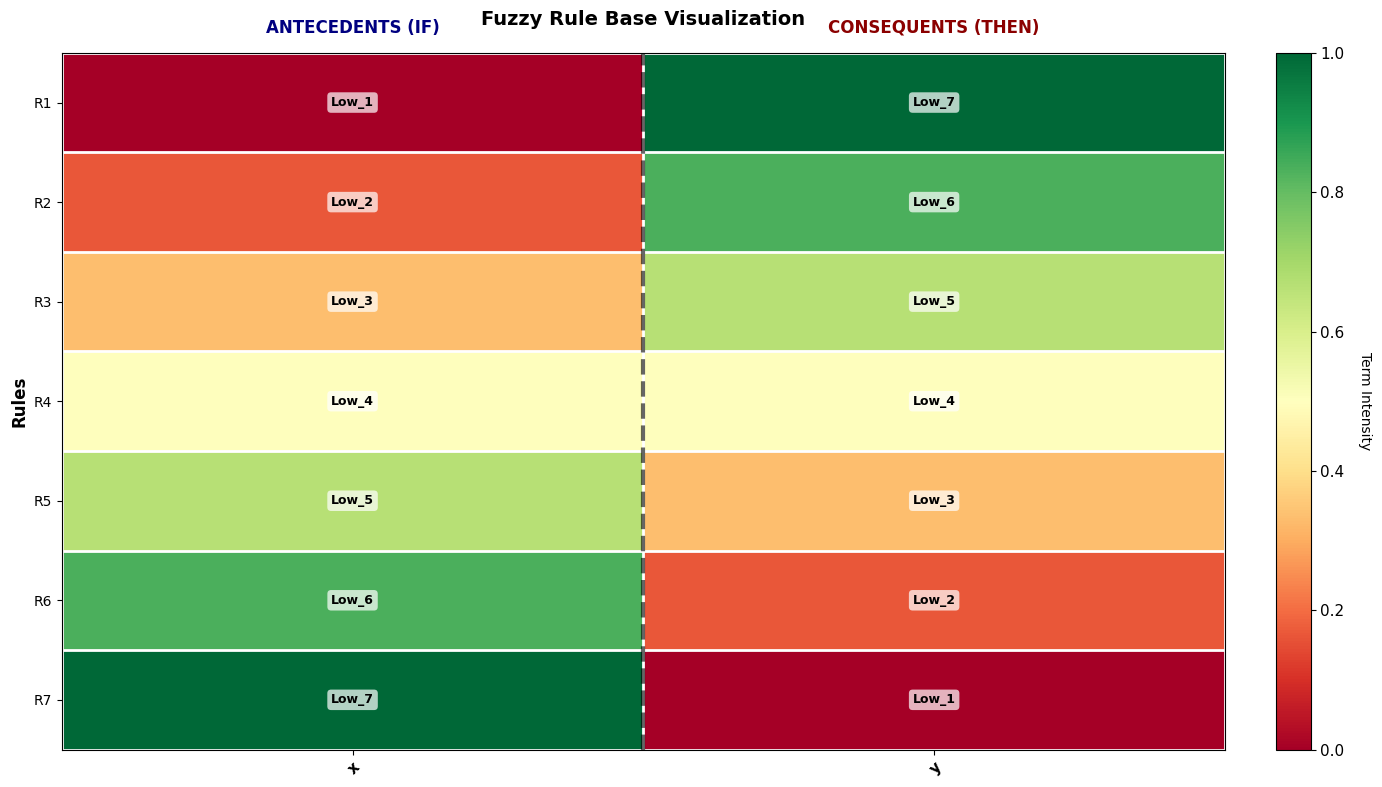

In [56]:
rm = fis.plot_rule_matrix()

### Test Several Optimizers

In [57]:
# ==================== 4. TESTAR DIFERENTES OTIMIZADORES ====================
print("\n" + "="*70)
print("🚀 TESTANDO OTIMIZADORES")
print("="*70)

# Criar learner
learner = MamdaniLearning(fis, num_points=1000, verbose=True)

# Dicionário para armazenar resultados
results = {}

# Configurações dos otimizadores
optimizers_config = {
    'SA': {
        'optimizer': 'sa',
        'params': {
            'temperature_init': 100.0,
            'cooling_rate': 0.95,
            'max_iterations': 2000,
            'plateau_iterations': 500,
            'temperature_min': 1e-6
        }
    },
    'GA': {
        'optimizer': 'ga',
        'params': {
            'pop_size': 50,
            'max_gen': 100,
            'mutation_rate': 0.1,
            'crossover_rate': 0.8
        }
    },
    'PSO': {
        'optimizer': 'pso',
        'params': {
            'n_particles': 30,
            'n_iterations': 100,
            'w_max': 0.9,
            'w_min': 0.4
        }
    },
    'DE': {
        'optimizer': 'de',
        'params': {
            'pop_size': 30,
            'max_iter': 100,
            'F': 0.8,
            'CR': 0.7
        }
    }
}

# Executar otimização para cada método
for opt_name, config in optimizers_config.items():
    print(f"\n{'='*70}")
    print(f"🔍 TESTANDO: {opt_name}")
    print(f"{'='*70}")

    try:
        # Treinar
        learner.fit_rules(
            X_train, y_train,
            optimizer=config['optimizer'],
            optimizer_params=config['params'],
            initial_solution_method='random'
        )

        # Avaliar
        y_pred_train = learner.predict(X_train)
        y_pred_test = learner.predict(X_test)

        rmse_train = learner.get_cost()
        rmse_test = learner.score(X_test, y_test)

        # Armazenar resultados
        results[opt_name] = {
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'rules': learner.get_rules().copy(),
            'history': learner.get_history(),
            'predictions_train': y_pred_train,
            'predictions_test': y_pred_test
        }

        print(f"\n✅ {opt_name} - Concluído:")
        print(f"   - RMSE Treino: {rmse_train:.6f}")
        print(f"   - RMSE Teste: {rmse_test:.6f}")
        print(f"   - Regras aprendidas: {learner.get_rules()}")

    except Exception as e:
        print(f"\n❌ Erro ao executar {opt_name}: {str(e)}")
        results[opt_name] = None




🚀 TESTANDO OTIMIZADORES

🔍 TESTANDO: SA

📚 MAMDANI FUZZY RULE LEARNING
Optimizer: SA

🔧 Creating efficient FIS representation:
 - Input variables: 1
 - MFs per input: [7]
 - Output MFs: 7
 - AND operator: TNorm.MIN
 - Implication: min
 - Aggregation: max
 - Defuzzification: DefuzzMethod.CENTROID
 - Total rules: 7

Dataset size: 50 samples

Pre-computing rule activations...
Pre-computed activations: shape (50, 7)
 - 50 samples
 - 7 rules

Initialization method: random
Simulated Annealing - Optimization
Initial cost: 1.005178
Initial temperature: 100.00
Iter    6 | T= 73.51 | New best solution! Cost: 0.857177
Iter    9 | T= 63.02 | New best solution! Cost: 0.806274
Iter   13 | T= 51.33 | New best solution! Cost: 0.802889
Iter   16 | T= 44.01 | New best solution! Cost: 0.730534
Iter   26 | T= 26.35 | New best solution! Cost: 0.710894
Iter   28 | T= 23.78 | New best solution! Cost: 0.609728
Iter   31 | T= 20.39 | New best solution! Cost: 0.484844
Iter   46 | T=  9.45 | New best solution! 

In [58]:
# ==================== 5. COMPARAÇÃO DE RESULTADOS ====================
print("\n" + "="*70)
print("📈 COMPARAÇÃO FINAL DE RESULTADOS")
print("="*70)

print(f"\n{'Optimizer':<12} {'RMSE Train':<15} {'RMSE Test':<15} {'Rules':<20}")
print("-"*70)

for opt_name, res in results.items():
    if res is not None:
        rules_str = str(res['rules'])
        print(f"{opt_name:<12} {res['rmse_train']:<15.6f} {res['rmse_test']:<15.6f} {rules_str:<20}")
    else:
        print(f"{opt_name:<12} {'FAILED':<15} {'FAILED':<15} {'-':<20}")

# Encontrar melhor otimizador
valid_results = {k: v for k, v in results.items() if v is not None}
if valid_results:
    best_optimizer = min(valid_results.items(), key=lambda x: x[1]['rmse_test'])
    print(f"\n🏆 MELHOR OTIMIZADOR: {best_optimizer[0]}")
    print(f"   - RMSE Test: {best_optimizer[1]['rmse_test']:.6f}")




📈 COMPARAÇÃO FINAL DE RESULTADOS

Optimizer    RMSE Train      RMSE Test       Rules               
----------------------------------------------------------------------
SA           0.069417        0.070438        [6 5 4 3 2 1 0]     
GA           0.069417        0.070438        [6 5 4 3 2 1 0]     
PSO          0.069417        0.070438        [6 5 4 3 2 1 0]     
DE           0.069417        0.070438        [6 5 4 3 2 1 0]     

🏆 MELHOR OTIMIZADOR: SA
   - RMSE Test: 0.070438



📊 GERANDO VISUALIZAÇÕES


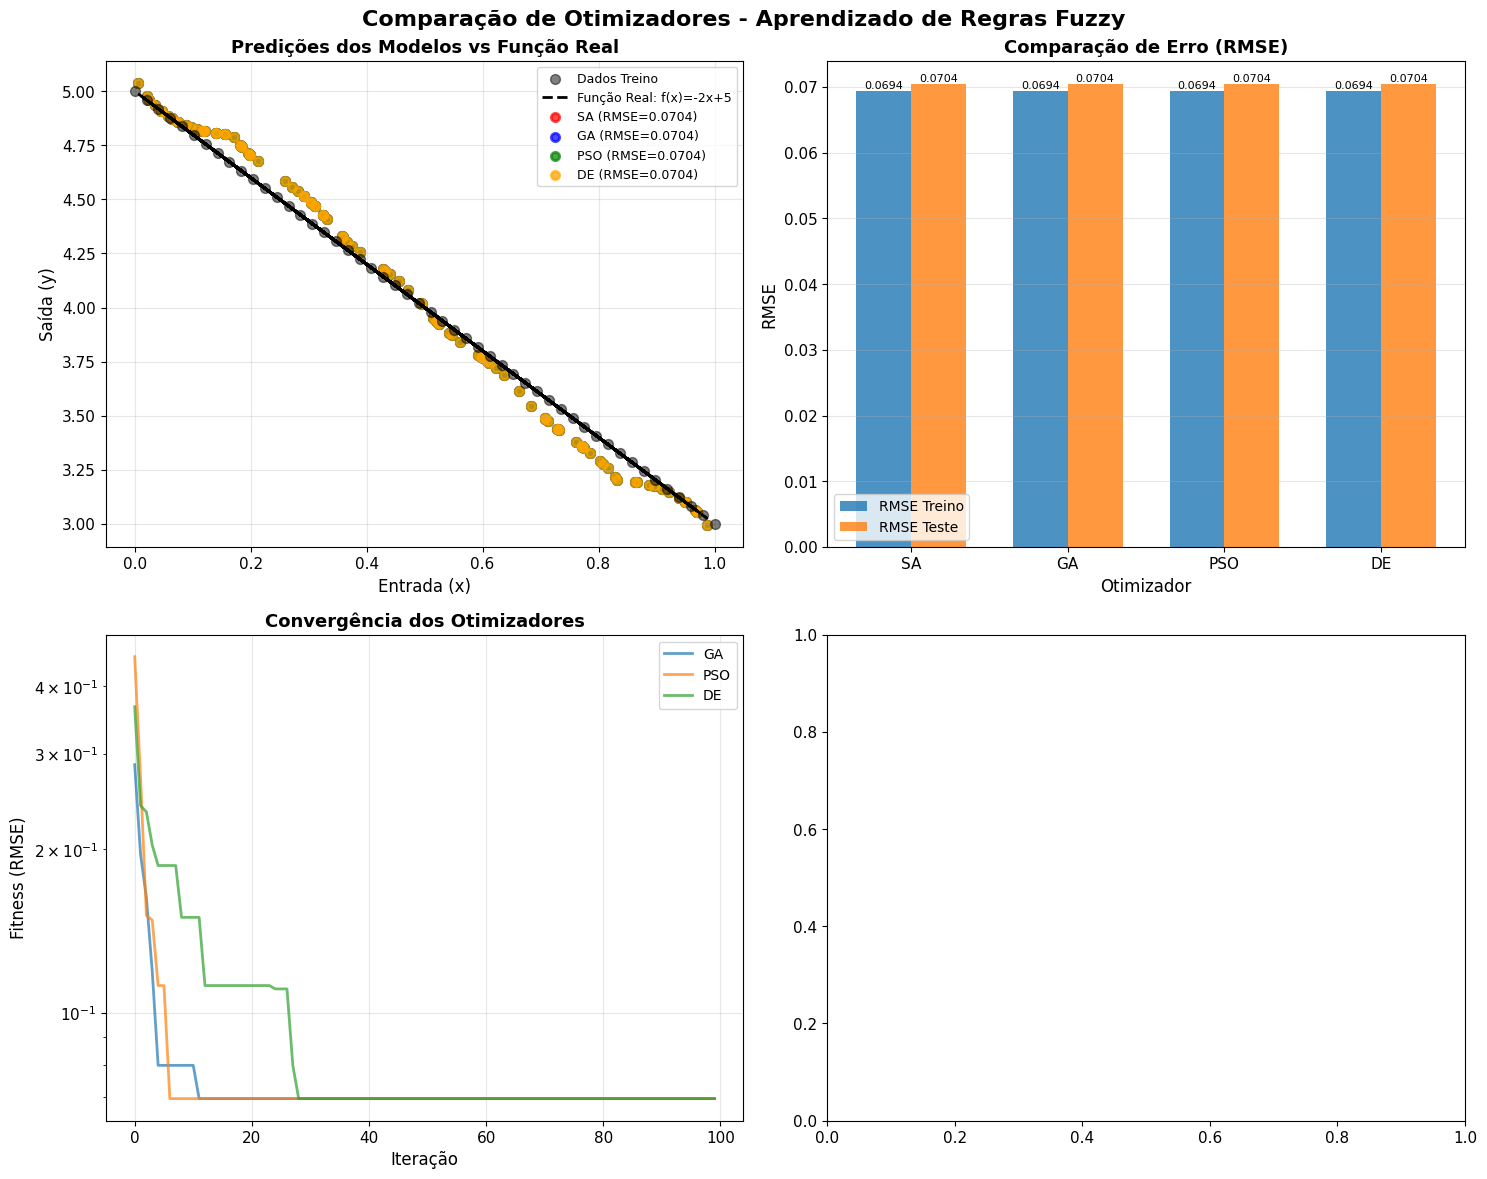

In [59]:
# ==================== 6. VISUALIZAÇÕES ====================
print("\n" + "="*70)
print("📊 GERANDO VISUALIZAÇÕES")
print("="*70)

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparação de Otimizadores - Aprendizado de Regras Fuzzy', 
             fontsize=16, fontweight='bold')

# Plot 1: Comparação de predições
ax1 = axes[0, 0]
ax1.scatter(X_train, y_train, c='black', alpha=0.5, s=50, label='Dados Treino', zorder=5)
ax1.plot(X_test, y_test, 'k--', linewidth=2, label='Função Real: f(x)=-2x+5', zorder=4)

colors = ['red', 'blue', 'green', 'orange']
for (opt_name, res), color in zip(valid_results.items(), colors):
    ax1.scatter(X_test, res['predictions_test'], 
            color=color, linewidth=2, alpha=0.7,
            label=f'{opt_name} (RMSE={res["rmse_test"]:.4f})')

ax1.set_xlabel('Entrada (x)', fontsize=12)
ax1.set_ylabel('Saída (y)', fontsize=12)
ax1.set_title('Predições dos Modelos vs Função Real', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Plot 2: RMSE Comparação
ax2 = axes[0, 1]
opt_names = list(valid_results.keys())
rmse_trains = [valid_results[opt]['rmse_train'] for opt in opt_names]
rmse_tests = [valid_results[opt]['rmse_test'] for opt in opt_names]

x_pos = np.arange(len(opt_names))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, rmse_trains, width, label='RMSE Treino', alpha=0.8)
bars2 = ax2.bar(x_pos + width/2, rmse_tests, width, label='RMSE Teste', alpha=0.8)

ax2.set_xlabel('Otimizador', fontsize=12)
ax2.set_ylabel('RMSE', fontsize=12)
ax2.set_title('Comparação de Erro (RMSE)', fontsize=13, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(opt_names)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=8)

# Plot 3: Convergência (primeiro otimizador com histórico)
ax3 = axes[1, 0]
for opt_name, res in valid_results.items():
    if isinstance(res['history'], list):
        ax3.plot(res['history'], linewidth=2, alpha=0.7, label=opt_name)
    elif isinstance(res['history'], dict) and 'best_fitness' in res['history']:
        ax3.plot(res['history']['best_fitness'], linewidth=2, alpha=0.7, label=opt_name)

ax3.set_xlabel('Iteração', fontsize=12)
ax3.set_ylabel('Fitness (RMSE)', fontsize=12)
ax3.set_title('Convergência dos Otimizadores', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# # Plot 4: Regras aprendidas (visualização)
# ax4 = axes[1, 1]
# rule_names = ['baixa→?', 'media→?', 'alta→?']
# output_terms = ['pequena', 'media', 'grande']

# # Criar matriz de regras
# rules_matrix = np.zeros((len(opt_names), 3))
# for i, opt_name in enumerate(opt_names):
#     rules_matrix[i] = valid_results[opt_name]['rules']

# im = ax4.imshow(rules_matrix, cmap='viridis', aspect='auto', vmin=0, vmax=2)

# # Configurar eixos
# ax4.set_xticks(np.arange(3))
# ax4.set_yticks(np.arange(len(opt_names)))
# ax4.set_xticklabels(rule_names)
# ax4.set_yticklabels(opt_names)

# # Adicionar texto com o termo de saída
# for i in range(len(opt_names)):
#     for j in range(3):
#         rule_idx = int(rules_matrix[i, j])
#         text = ax4.text(j, i, output_terms[rule_idx],
#                        ha="center", va="center", color="white", fontweight='bold', fontsize=10)

# ax4.set_title('Regras Aprendidas por Otimizador', fontsize=13, fontweight='bold')
# fig.colorbar(im, ax=ax4, label='Índice do Termo de Saída')

plt.tight_layout()
plt.show()


In [60]:
# ==================== 7. ANÁLISE DETALHADA ====================
print("\n" + "="*70)
print("🔬 ANÁLISE DETALHADA DAS REGRAS")
print("="*70)

input_terms = list(fis.input_variables['x'].terms)
output_terms_list = list(fis.output_variables['y'].terms)

for opt_name, res in valid_results.items():
    print(f"\n{opt_name}:")
    print("-" * 40)
    for i, (inp_term, out_idx) in enumerate(zip(input_terms, res['rules'])):
        out_term = output_terms_list[int(out_idx)]
        print(f"  Rule {i+1}: IF entrada IS {inp_term} THEN saida IS {out_term}")

print("\n" + "="*70)
print("✅ ANÁLISE COMPLETA!")
print("="*70)


🔬 ANÁLISE DETALHADA DAS REGRAS

SA:
----------------------------------------
  Rule 1: IF entrada IS Low_1 THEN saida IS Low_7
  Rule 2: IF entrada IS Low_2 THEN saida IS Low_6
  Rule 3: IF entrada IS Low_3 THEN saida IS Low_5
  Rule 4: IF entrada IS Low_4 THEN saida IS Low_4
  Rule 5: IF entrada IS Low_5 THEN saida IS Low_3
  Rule 6: IF entrada IS Low_6 THEN saida IS Low_2
  Rule 7: IF entrada IS Low_7 THEN saida IS Low_1

GA:
----------------------------------------
  Rule 1: IF entrada IS Low_1 THEN saida IS Low_7
  Rule 2: IF entrada IS Low_2 THEN saida IS Low_6
  Rule 3: IF entrada IS Low_3 THEN saida IS Low_5
  Rule 4: IF entrada IS Low_4 THEN saida IS Low_4
  Rule 5: IF entrada IS Low_5 THEN saida IS Low_3
  Rule 6: IF entrada IS Low_6 THEN saida IS Low_2
  Rule 7: IF entrada IS Low_7 THEN saida IS Low_1

PSO:
----------------------------------------
  Rule 1: IF entrada IS Low_1 THEN saida IS Low_7
  Rule 2: IF entrada IS Low_2 THEN saida IS Low_6
  Rule 3: IF entrada IS Low_3